In [1]:
from pydriller import Repository
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_pr = pd.read_csv("pr_reviews_Reflex.csv")
df_pr.columns = [
  "author_login",
  "author_association",
  "body",
  "submitted_at",
  "includes_created_edit",
  "state"
]
df_pr

,author_login,author_association,body,submitted_at,includes_created_edit,state
0,picklelo,CONTRIBUTOR,We should remove these from reflex-web docs as...,2024-10-15T01:02:08Z,False,APPROVED
1,adhami3310,MEMBER,NaN,2024-10-15T01:16:24Z,False,APPROVED
2,masenf,COLLABORATOR,this is cool. cleans up a lot of more complex ...,2024-10-14T22:46:44Z,False,COMMENTED
3,adhami3310,MEMBER,NaN,2024-10-14T22:48:30Z,False,COMMENTED
4,adhami3310,MEMBER,NaN,2024-10-14T22:49:52Z,False,COMMENTED
...,...,...,...,...,...,...
3984,picklelo,CONTRIBUTOR,NaN,2022-11-20T21:46:23Z,False,COMMENTED
3985,Alek99,MEMBER,NaN,2022-11-20T22:19:26Z,False,COMMENTED
3986,picklelo,CONTRIBUTOR,NaN,2022-11-20T22:32:54Z,False,COMMENTED
3987,Alek99,MEMBER,NaN,2022-11-20T22:33:57Z,False,APPROVED


In [3]:
repositorio = "https://github.com/reflex-dev/reflex.git"
df_commits = pd.read_csv("DF Commits Reflex.csv")
df_commits

,hash,message,author_name,author_email,author_date,committer_name,committer_email,committer_date
0,e8e8eaa010f08ed4b0c7a3b773cd8cbf68018f97,Initial commit.,Nikhil Rao,nikhil@pynecone.io,2022-11-18 04:47:00-08:00,Nikhil Rao,nikhil@pynecone.io,2022-11-18 12:44:06-08:00
1,bbdc4a08fd69151399a97a45fd79be7f22a1bc39,Update README.md,Alek Petuskey,17petuskey@berkeley.edu,2022-11-18 17:43:39-08:00,GitHub,noreply@github.com,2022-11-18 17:43:39-08:00
2,3dbf7d713973a00b69fa7d99a6e3ca0775729370,Delete Counter.gif,Alek Petuskey,17petuskey@berkeley.edu,2022-11-18 17:43:53-08:00,GitHub,noreply@github.com,2022-11-18 17:43:53-08:00
3,b1c10d3adac55acecd01783d84355293823b10ac,Added counter gif,Alek Petuskey,alek@pynecone.io,2022-11-18 17:44:47-08:00,GitHub,noreply@github.com,2022-11-18 17:44:47-08:00
4,2008417bd7e1f40094efd00521f56e6f535ce8ed,Clean up tags.,Nikhil Rao,nikhil@pynecone.io,2022-11-18 13:04:16-08:00,Nikhil Rao,nikhil@pynecone.io,2022-11-18 17:48:51-08:00
...,...,...,...,...,...,...,...,...
1839,b1d449897a14d3c0646f08ed3b0809f314923544,unionize base var fields types (#4153)\n\n* un...,Khaleel Al-Adhami,khaleel.aladhami@gmail.com,2024-10-11 17:27:15-07:00,GitHub,noreply@github.com,2024-10-11 17:27:15-07:00
1840,b2d2719f90d5d71b88ac3f2dd8c8d39b72e49e07,add type hinting to events (#4145)\n\n* add ty...,Khaleel Al-Adhami,khaleel.aladhami@gmail.com,2024-10-14 08:44:31-07:00,GitHub,noreply@github.com,2024-10-14 08:44:31-07:00
1841,1d268f8b135b3d5acce8c64cd7833d3796975b16,Support aria and data props (#4149)\n\n* Suppo...,Masen Furer,m_github@0x26.net,2024-10-14 08:45:25-07:00,GitHub,noreply@github.com,2024-10-14 08:45:25-07:00
1842,d6797a1f1d764a74bc9283f753a9b0d5702cd9b9,Change the defalut direction of radio group (#...,Manoj Bhat,99398172+Manojvbhat@users.noreply.github.com,2024-10-14 21:05:38+05:18,GitHub,noreply@github.com,2024-10-14 08:47:38-07:00


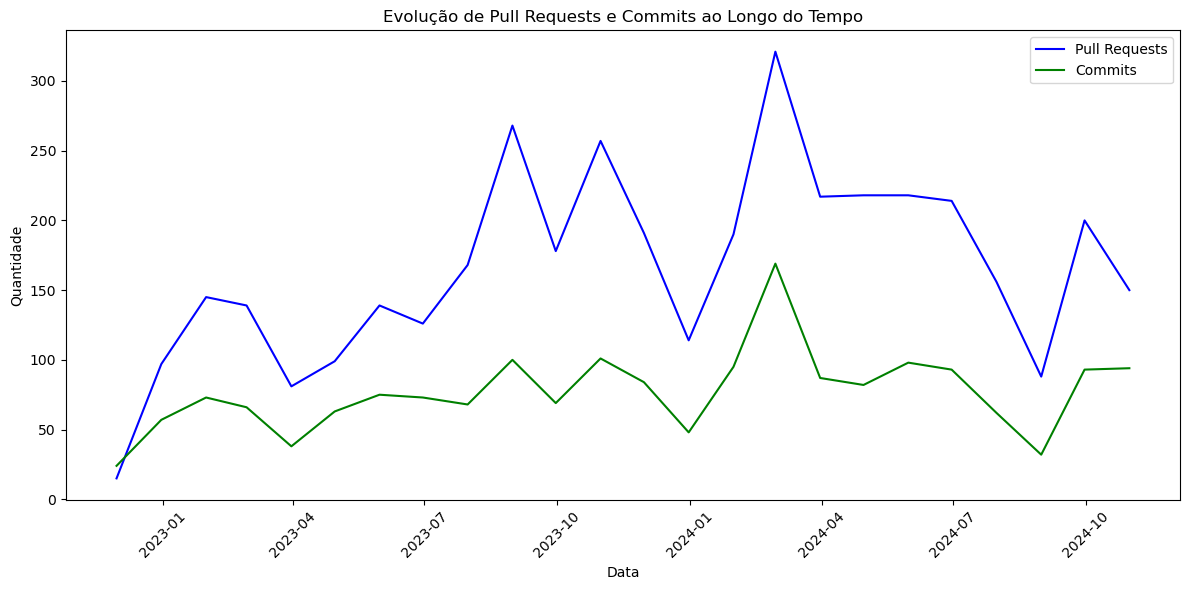

In [4]:
# Converter a coluna de data de Pull Requests para datetime e configurar como índice
df_pr['submitted_at'] = pd.to_datetime(df_pr['submitted_at'], errors='coerce')
df_pr = df_pr.dropna(subset=['submitted_at'])
df_pr.set_index('submitted_at', inplace=True)
monthly_pull_requests = df_pr.resample('M').size()

# Converter a coluna de data de Commits para datetime com timezone UTC e configurar como índice
df_commits['author_date'] = pd.to_datetime(df_commits['author_date'], errors='coerce', utc=True)
df_commits = df_commits.dropna(subset=['author_date'])
df_commits.set_index('author_date', inplace=True)
monthly_commits = df_commits.resample('M').size()

# Criar a figura para o gráfico sobreposto
plt.figure(figsize=(12, 6))

# Plotar Pull Requests
sns.lineplot(x=monthly_pull_requests.index, y=monthly_pull_requests.values, color='blue', label='Pull Requests')

# Plotar Commits
sns.lineplot(x=monthly_commits.index, y=monthly_commits.values, color='green', label='Commits')

# Configurar título, rótulos e legenda
plt.title('Evolução de Pull Requests e Commits ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.legend()  # Exibe a legenda para diferenciar as linhas

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


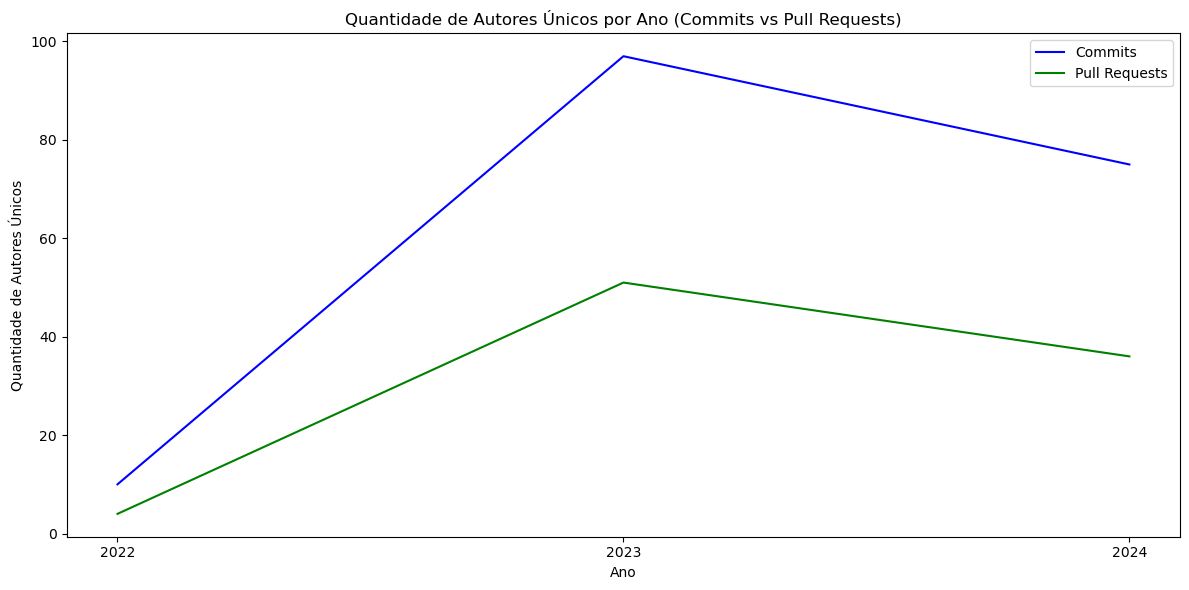

In [7]:
# Conversão de datas e contagem de autores (commits)
df_commits['author_date'] = pd.to_datetime(df_commits['author_date'], errors='coerce', utc=True)
df_commits = df_commits.dropna(subset=['author_date'])
df_commits['year'] = df_commits['author_date'].dt.year
authors_commits_per_year = df_commits.groupby('year')['author_email'].nunique()

# Conversão de datas e contagem de autores (pull requests)
df_pr['submitted_at'] = pd.to_datetime(df_pr['submitted_at'], errors='coerce')
df_pr = df_pr.dropna(subset=['submitted_at'])
df_pr['year'] = df_pr['submitted_at'].dt.year
authors_pr_per_year = df_pr.groupby('year')['author_login'].nunique()

# Plotando os dois gráficos juntos
plt.figure(figsize=(12, 6))

# Gráfico para os commits
plt.plot(authors_commits_per_year.index, authors_commits_per_year.values, label='Commits', color='blue', marker='', linestyle='-')

# Gráfico para os pull requests
plt.plot(authors_pr_per_year.index, authors_pr_per_year.values, label='Pull Requests', color='green', marker='', linestyle='-')

# Configurações do gráfico
plt.title('Quantidade de Autores Únicos por Ano (Commits vs Pull Requests)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Autores Únicos')
plt.xticks(authors_commits_per_year.index)  # Exibir todos os anos
plt.legend()  # Mostrar a legenda para diferenciar as linhas
plt.grid(False)
plt.tight_layout()

# Exibir o gráfico
plt.show()